In [78]:
import pandas as pd
import numpy as np

url1 = 'https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

df1 = pd.read_html(url1, attrs={'id': 'stats_standard'})[0]
df1.head(10)

Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk               Player             Nation   
0                  1           Max Aarons            eng ENG   
1                  2       Rodrigo Abajas             es ESP   
2                  3       James Abankwah             ie IRL   
3                  4    Keyliane Abdallah             fr FRA   
4                  5     Yunis Abdelhamid             ma MAR   
5                  6        Himad Abdelli             dz ALG   
6                  7  Mohamed Abdelmoneim             eg EGY   
7                  8             Ali Abdi             tn TUN   
8                  9      Saud Abdulhamid             sa KSA   
9                 10                 Abel             es ESP   

  Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                 Pos              Squad                Comp   
0                 DF        Bournemouth  eng Premier League   
1                 DF           Valencia          es La Liga   
2              DF,MF            Udinese          it Serie A   
3                 FW          Marseille          fr Ligue 1   
4                 DF      Saint-Étienne          fr Ligue 1   
5              MF,FW             Angers          fr Ligue 1   
6                 DF               Nice          fr Ligue 1   
7              DF,MF               Nice          fr Ligue 1   
8                 DF               Roma          it Serie A   
9              DF,FW            Osasuna          es La Liga   

  Unnamed: 6_level_0 Unnamed: 7_level_0 Playing Time         ...  \
                 Age               Born           MP Starts  ...   
0             24-343               2000            1      0  ...   
1             21-214               2003            1      1  ...   
2             20-331               2004            3      0  ...   
3             18-251               2006            1      0  ...   
4             37-075               1987           10     10  ...   
5             25-025               1999           14     14  ...   
6             25-315               1999            7      6  ...   
7             30-358               1993            8      6  ...   
8             25-147               1999            2      0  ...   
9             24-113               2000           15     10  ...   

  Per 90 Minutes                                                       \
             Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG   
0           0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00     0.00   
1           0.00  0.00  0.00   0.00  0.10  0.00   0.10  0.10     0.10   
2           0.00  0.00  0.00   0.00  0.33  0.00   0.33  0.33     0.33   
3           0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00     0.00   
4           0.00  0.00  0.00   0.00  0.03  0.00   0.03  0.03     0.03   
5           0.07  0.36  0.15   0.22  0.30  0.16   0.46  0.13     0.29   
6           0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00     0.00   
7           0.31  0.46  0.15   0.46  0.14  0.19   0.33  0.14     0.33   
8           1.11  1.11  0.00   1.11  0.00  0.13   0.13  0.00     0.13   
9           0.00  0.19  0.19   0.19  0.03  0.06   0.09  0.03     0.09   

  Unnamed: 37_level_0  
              Matches  
0             Matches  
1             Matches  
2             Matches  
3             Matches  
4             Matches  
5             Matches  
6             Matches  
7             Matches  
8             Matches  
9             Matches  

[10 rows x 38 columns]

In [79]:
df1 = df1[df1.columns.drop(list(df1.filter(regex='Per 90')))]
df1 = df1.droplevel(0, axis=1)
df1.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-343,2000,1,0,...,0,0,0.0,0.0,0.0,0.0,1,4,3,Matches
1,2,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21-214,2003,1,1,...,1,0,0.1,0.1,0.0,0.1,3,2,3,Matches
2,3,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20-331,2004,3,0,...,0,0,0.1,0.1,0.0,0.1,2,0,0,Matches
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-251,2006,1,0,...,0,0,0.0,0.0,0.0,0.0,1,0,0,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Saint-Étienne,fr Ligue 1,37-075,1987,10,10,...,1,0,0.2,0.2,0.0,0.3,4,21,3,Matches


In [80]:
pl_df = df1[df1['Comp'] == 'eng Premier League']
pl_df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-343,2000,1,0,...,0,0,0.0,0.0,0.0,0.0,1,4,3,Matches
22,23,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,25-302,1999,6,4,...,2,0,1.0,1.0,0.4,1.5,1,13,0,Matches
24,25,Tosin Adarabioyo,eng ENG,DF,Chelsea,eng Premier League,27-079,1997,5,3,...,1,0,0.2,0.2,0.0,0.2,0,4,0,Matches
28,28,Simon Adingra,ci CIV,"FW,MF",Brighton,eng Premier League,22-346,2002,10,3,...,0,0,0.6,0.6,0.6,1.2,14,6,53,Matches
36,36,Asher Agbinone,eng ENG,MF,Crystal Palace,eng Premier League,19-075,2005,2,0,...,0,0,0.0,0.0,0.0,0.1,2,0,1,Matches


In [81]:
pl_df = pl_df[['Player', 'Squad', 'MP', 'Starts', 'Min', '90s', 'CrdY', 'Gls', 'Ast', 'G+A', 'xG', 'xAG']]

pl_df.loc[:, pl_df.columns.difference(['Player', 'Squad'])] = pl_df.loc[:, pl_df.columns.difference(['Player', 'Squad'])].apply(pd.to_numeric, errors='coerce')

pl_df['xG+xAG'] = pl_df['xG'] + pl_df['xAG']
pl_df['(Gls+Ast)/MP'] = (pl_df['Gls'] + pl_df['Ast']) / pl_df['MP']
pl_df.head()

,Player,Squad,MP,Starts,Min,90s,CrdY,Gls,Ast,G+A,xG,xAG,xG+xAG,(Gls+Ast)/MP
0,Max Aarons,Bournemouth,1,0,16,0.2,0,0,0,0,0.0,0.0,0.0,0.0
22,Tyler Adams,Bournemouth,6,4,345,3.8,2,0,0,0,1.0,0.4,1.4,0.0
24,Tosin Adarabioyo,Chelsea,5,3,263,2.9,1,0,0,0,0.2,0.0,0.2,0.0
28,Simon Adingra,Brighton,10,3,330,3.7,0,1,1,2,0.6,0.6,1.2,0.2
36,Asher Agbinone,Crystal Palace,2,0,6,0.1,0,0,0,0,0.0,0.0,0.0,0.0


In [82]:
    pl_df[pl_df['MP'] > 0.7 * pl_df['MP'].max()].sort_values(by='(Gls+Ast)/MP', ascending=False).head(30)

,Player,Squad,MP,Starts,Min,90s,CrdY,Gls,Ast,G+A,xG,xAG,xG+xAG,(Gls+Ast)/MP
1982,Mohamed Salah,Liverpool,14,14,1226,13.6,1,13,8,21,10.4,5.1,15.5,1.5
1743,Cole Palmer,Chelsea,15,15,1297,14.4,3,11,6,17,10.1,5.6,15.7,1.133333
1978,Bukayo Saka,Arsenal,14,14,1155,12.8,3,5,10,15,3.9,5.5,9.4,1.071429
939,Erling Haaland,Manchester City,15,15,1349,15.0,2,13,1,14,12.9,1.0,13.9,0.933333
2398,Yoane Wissa,Brentford,12,11,882,9.8,1,9,1,10,6.3,0.7,7.0,0.833333
1051,Nicolas Jackson,Chelsea,14,14,1100,12.2,4,8,3,11,7.4,1.8,9.2,0.785714
1454,Bryan Mbeumo,Brentford,15,15,1344,14.9,2,9,2,11,4.3,2.9,7.2,0.733333
1038,Alexander Isak,Newcastle Utd,13,13,1055,11.7,0,6,3,9,5.7,2.0,7.7,0.692308
534,Matheus Cunha,Wolves,15,14,1245,13.8,2,7,3,10,3.4,4.3,7.7,0.666667
2371,Ollie Watkins,Aston Villa,15,14,1109,12.3,0,7,3,10,8.7,1.6,10.3,0.666667


In [83]:
pl_df[pl_df['MP'] > 0.7 * pl_df['MP'].max()].sort_values(by='xG+xAG', ascending=False).head(30)

,Player,Squad,MP,Starts,Min,90s,CrdY,Gls,Ast,G+A,xG,xAG,xG+xAG,(Gls+Ast)/MP
1743,Cole Palmer,Chelsea,15,15,1297,14.4,3,11,6,17,10.1,5.6,15.7,1.133333
1982,Mohamed Salah,Liverpool,14,14,1226,13.6,1,13,8,21,10.4,5.1,15.5,1.5
939,Erling Haaland,Manchester City,15,15,1349,15.0,2,13,1,14,12.9,1.0,13.9,0.933333
2371,Ollie Watkins,Aston Villa,15,14,1109,12.3,0,7,3,10,8.7,1.6,10.3,0.666667
1978,Bukayo Saka,Arsenal,14,14,1155,12.8,3,5,10,15,3.9,5.5,9.4,1.071429
1051,Nicolas Jackson,Chelsea,14,14,1100,12.2,4,8,3,11,7.4,1.8,9.2,0.785714
2120,Dominic Solanke,Tottenham,12,12,1067,11.9,0,5,2,7,6.7,1.6,8.3,0.583333
754,Bruno Fernandes,Manchester Utd,15,15,1249,13.9,1,3,5,8,4.4,3.7,8.1,0.533333
983,Son Heung-min,Tottenham,12,11,940,10.4,0,4,4,8,3.1,5.0,8.1,0.666667
964,Kai Havertz,Arsenal,14,14,1243,13.8,2,5,2,7,5.8,2.0,7.8,0.5


In [84]:
filtered_df = pl_df[pl_df['MP'] > 0.7 * pl_df['MP'].max()]

filtered_df['rank_GlsAst_per_MP'] = filtered_df['(Gls+Ast)/MP'].rank(ascending=False)
filtered_df['rank_xG_xAG'] = filtered_df['xG+xAG'].rank(ascending=False)

filtered_df['combined_rank'] = filtered_df['rank_GlsAst_per_MP'] + filtered_df['rank_xG_xAG']
filtered_df['Gls+Ast'] = filtered_df['Gls'] + filtered_df['Ast']
filtered_df['delta'] = filtered_df['Gls+Ast'] - filtered_df['xG+xAG']

top = filtered_df.sort_values(by='combined_rank').head(30)

top[['Player', '(Gls+Ast)/MP', 'Gls+Ast', 'xG+xAG', 'combined_rank', 'delta']]

/var/folders/tn/2spq72m9385bz56_ft5yg5s80000gn/T/ipykernel_50684/307006931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rank_GlsAst_per_MP'] = filtered_df['(Gls+Ast)/MP'].rank(ascending=False)
/var/folders/tn/2spq72m9385bz56_ft5yg5s80000gn/T/ipykernel_50684/307006931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rank_xG_xAG'] = filtered_df['xG+xAG'].rank(ascending=False)
/var/folders/tn/2spq72m9385bz56_ft5yg5s80000gn/T/ipykernel_50684/307006931.py:6: SettingWithCopyWar

,Player,(Gls+Ast)/MP,Gls+Ast,xG+xAG,combined_rank,delta
1982,Mohamed Salah,1.5,21,15.5,3.0,5.5
1743,Cole Palmer,1.133333,17,15.7,3.0,1.3
939,Erling Haaland,0.933333,14,13.9,7.0,0.1
1978,Bukayo Saka,1.071429,15,9.4,8.0,5.6
1051,Nicolas Jackson,0.785714,11,9.2,12.0,1.8
2371,Ollie Watkins,0.666667,10,10.3,14.5,-0.3
983,Son Heung-min,0.666667,8,8.1,19.0,-0.1
1038,Alexander Isak,0.692308,9,7.7,19.5,1.3
534,Matheus Cunha,0.666667,10,7.7,22.0,2.3
2120,Dominic Solanke,0.583333,7,8.3,22.0,-1.3


In [85]:
filtered_df[filtered_df['Player'] == 'Evanilson'].sort_values(by='xG+xAG', ascending=False).head(30)

,Player,Squad,MP,Starts,Min,90s,CrdY,Gls,Ast,G+A,xG,xAG,xG+xAG,(Gls+Ast)/MP,rank_GlsAst_per_MP,rank_xG_xAG,combined_rank,Gls+Ast,delta
729,Evanilson,Bournemouth,14,13,1030,11.4,0,4,0,4,5.8,0.9,6.7,0.285714,54.5,24.0,78.5,4,-2.7


In [86]:
url2 = 'https://fbref.com/en/comps/9/Premier-League-Stats'

df2 = pd.read_html(url2, attrs={'id': 'results2024-202591_overall'})[0]
df2.head(10)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,14,11,2,1,29,11,18,35,2.50,28.6,13.5,15.1,1.08,W W W W D,60265,Mohamed Salah - 13,Caoimhín Kelleher,NaN
1,2,Chelsea,15,9,4,2,35,18,17,31,2.07,32.0,21.7,10.3,0.69,D W W W W,39753,Cole Palmer - 11,Robert Sánchez,NaN
2,3,Arsenal,15,8,5,2,29,15,14,29,1.93,25.6,14.2,11.5,0.77,D W W W D,60308,"Kai Havertz, Bukayo Saka - 5",David Raya,NaN
3,4,Manchester City,15,8,3,4,27,21,6,27,1.80,28.7,21.3,7.4,0.49,L L L W D,52606,Erling Haaland - 13,Ederson,NaN
4,5,Nott'ham Forest,15,7,4,4,19,18,1,25,1.67,18.0,16.9,1.1,0.08,L L W L W,29965,Chris Wood - 10,Matz Sels,NaN
5,6,Aston Villa,15,7,4,4,23,23,0,25,1.67,25.1,17.4,7.7,0.51,L D L W W,41845,Ollie Watkins - 7,Emiliano Martínez,NaN
6,7,Brighton,15,6,6,3,25,22,3,24,1.60,22.0,23.3,-1.3,-0.09,W W D L D,33020,Danny Welbeck - 6,Bart Verbruggen,NaN
7,8,Bournemouth,15,7,3,5,23,20,3,24,1.60,30.4,18.0,12.5,0.83,L L W W W,11219,Justin Kluivert - 5,Kepa Arrizabalaga,NaN
8,9,Brentford,15,7,2,6,31,28,3,23,1.53,23.8,25.4,-1.6,-0.10,W D W L W,16976,"Yoane Wissa, Bryan Mbeumo - 9",Mark Flekken,NaN
9,10,Fulham,15,6,5,4,22,20,2,23,1.53,20.7,18.0,2.7,0.18,W L D W D,26164,"Raúl Jiménez, Alex Iwobi - 5",Bernd Leno,NaN


In [87]:
tm_df = df2[['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90']].copy()

for column in tm_df.columns:
    if column != 'Squad':
        tm_df[column] = pd.to_numeric(tm_df[column], errors='coerce')

tm_df['GF-xG'] = tm_df['GF'] - tm_df['xG']
tm_df['GA-xGA'] = tm_df['GA'] - tm_df['xGA']
tm_df.head(20)

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Pts/MP,xG,xGA,xGD,xGD/90,GF-xG,GA-xGA
0,1,Liverpool,14,11,2,1,29,11,35,2.50,28.6,13.5,15.1,1.08,0.4,-2.5
1,2,Chelsea,15,9,4,2,35,18,31,2.07,32.0,21.7,10.3,0.69,3.0,-3.7
2,3,Arsenal,15,8,5,2,29,15,29,1.93,25.6,14.2,11.5,0.77,3.4,0.8
3,4,Manchester City,15,8,3,4,27,21,27,1.80,28.7,21.3,7.4,0.49,-1.7,-0.3
4,5,Nott'ham Forest,15,7,4,4,19,18,25,1.67,18.0,16.9,1.1,0.08,1.0,1.1
5,6,Aston Villa,15,7,4,4,23,23,25,1.67,25.1,17.4,7.7,0.51,-2.1,5.6
6,7,Brighton,15,6,6,3,25,22,24,1.60,22.0,23.3,-1.3,-0.09,3.0,-1.3
7,8,Bournemouth,15,7,3,5,23,20,24,1.60,30.4,18.0,12.5,0.83,-7.4,2.0
8,9,Brentford,15,7,2,6,31,28,23,1.53,23.8,25.4,-1.6,-0.10,7.2,2.6
9,10,Fulham,15,6,5,4,22,20,23,1.53,20.7,18.0,2.7,0.18,1.3,2.0


In [88]:
tm_df.sort_values(by='xGA', ascending=True).head(20)

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Pts/MP,xG,xGA,xGD,xGD/90,GF-xG,GA-xGA
0,1,Liverpool,14,11,2,1,29,11,35,2.50,28.6,13.5,15.1,1.08,0.4,-2.5
2,3,Arsenal,15,8,5,2,29,15,29,1.93,25.6,14.2,11.5,0.77,3.4,0.8
4,5,Nott'ham Forest,15,7,4,4,19,18,25,1.67,18.0,16.9,1.1,0.08,1.0,1.1
5,6,Aston Villa,15,7,4,4,23,23,25,1.67,25.1,17.4,7.7,0.51,-2.1,5.6
7,8,Bournemouth,15,7,3,5,23,20,24,1.60,30.4,18.0,12.5,0.83,-7.4,2.0
9,10,Fulham,15,6,5,4,22,20,23,1.53,20.7,18.0,2.7,0.18,1.3,2.0
14,15,Everton,14,3,5,6,14,21,14,1.00,14.7,18.9,-4.2,-0.30,-0.7,2.1
11,12,Newcastle Utd,15,5,5,5,19,21,20,1.33,21.5,20.4,1.1,0.07,-2.5,0.6
16,17,Crystal Palace,15,2,7,6,14,20,13,0.87,19.7,21.1,-1.4,-0.09,-5.7,-1.1
3,4,Manchester City,15,8,3,4,27,21,27,1.80,28.7,21.3,7.4,0.49,-1.7,-0.3


In [89]:
tm_df.sort_values(by='xG', ascending=False).head(20)

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Pts/MP,xG,xGA,xGD,xGD/90,GF-xG,GA-xGA
1,2,Chelsea,15,9,4,2,35,18,31,2.07,32.0,21.7,10.3,0.69,3.0,-3.7
7,8,Bournemouth,15,7,3,5,23,20,24,1.60,30.4,18.0,12.5,0.83,-7.4,2.0
3,4,Manchester City,15,8,3,4,27,21,27,1.80,28.7,21.3,7.4,0.49,-1.7,-0.3
0,1,Liverpool,14,11,2,1,29,11,35,2.50,28.6,13.5,15.1,1.08,0.4,-2.5
10,11,Tottenham,15,6,2,7,31,19,20,1.33,28.2,22.9,5.3,0.35,2.8,-3.9
2,3,Arsenal,15,8,5,2,29,15,29,1.93,25.6,14.2,11.5,0.77,3.4,0.8
5,6,Aston Villa,15,7,4,4,23,23,25,1.67,25.1,17.4,7.7,0.51,-2.1,5.6
8,9,Brentford,15,7,2,6,31,28,23,1.53,23.8,25.4,-1.6,-0.10,7.2,2.6
6,7,Brighton,15,6,6,3,25,22,24,1.60,22.0,23.3,-1.3,-0.09,3.0,-1.3
11,12,Newcastle Utd,15,5,5,5,19,21,20,1.33,21.5,20.4,1.1,0.07,-2.5,0.6


In [90]:
pldf_relevant = pl_df[['Player', 'Squad', 'Gls', 'Ast', 'xG', 'xAG']]
tmdf_relevant = tm_df[['Squad', 'GF', 'xG']].rename(columns={'GF': 'squad_g', 'xG': 'squad_xg'})

talismen = pldf_relevant.merge(tmdf_relevant, on='Squad', how='left')

talismen['player_g+ag'] = talismen['Gls'] + talismen['Ast']
talismen['player_xg+xag'] = talismen['xG'] + talismen['xAG']
talismen['player_g+ag/squad_g'] = talismen['player_g+ag']*100 / talismen['squad_g']
talismen['player_xg+xag/squad_xg'] = talismen['player_xg+xag']*100 / talismen['squad_xg']
talismen['player_g/player_ag'] = talismen.apply(
    lambda row: row['Gls'] / row['Ast'] if row['Ast'] != 0 else np.nan, axis=1
)

talismen.head()

talismen.rename(columns={
    'Player': 'player',
    'Squad': 'squad',
    'Gls': 'player_g',
    'Ast': 'player_ag',
    'xG': 'player_xg',
    'xAG': 'player_xag'
}, inplace=True)

talismen.head()

,player,squad,player_g,player_ag,player_xg,player_xag,squad_g,squad_xg,player_g+ag,player_xg+xag,player_g+ag/squad_g,player_xg+xag/squad_xg,player_g/player_ag
0,Max Aarons,Bournemouth,0,0,0.0,0.0,23,30.4,0,0.0,0.0,0.0,NaN
1,Tyler Adams,Bournemouth,0,0,1.0,0.4,23,30.4,0,1.4,0.0,4.605263,NaN
2,Tosin Adarabioyo,Chelsea,0,0,0.2,0.0,35,32.0,0,0.2,0.0,0.625,NaN
3,Simon Adingra,Brighton,1,1,0.6,0.6,25,22.0,2,1.2,8.0,5.454545,1.0
4,Asher Agbinone,Crystal Palace,0,0,0.0,0.0,14,19.7,0,0.0,0.0,0.0,NaN


In [91]:
talismen.sort_values(by='player_g+ag/squad_g', ascending=False).head(20)

,player,squad,player_g,player_ag,player_xg,player_xag,squad_g,squad_xg,player_g+ag,player_xg+xag,player_g+ag/squad_g,player_xg+xag/squad_xg,player_g/player_ag
374,Mohamed Salah,Liverpool,13,8,10.4,5.1,29,28.6,21,15.5,72.413793,54.195804,1.625000
473,Chris Wood,Nott'ham Forest,10,0,6.1,1.0,19,18.0,10,7.1,52.631579,39.444444,NaN
180,Erling Haaland,Manchester City,13,1,12.9,1.0,27,28.7,14,13.9,51.851852,48.432056,13.000000
373,Bukayo Saka,Arsenal,5,10,3.9,5.5,29,25.6,15,9.4,51.724138,36.71875,0.500000
103,Liam Delap,Ipswich Town,6,1,4.1,1.0,14,14.1,7,5.1,50.0,36.170213,6.000000
338,Cole Palmer,Chelsea,11,6,10.1,5.6,35,32.0,17,15.7,48.571429,49.0625,1.833333
205,Alexander Isak,Newcastle Utd,6,3,5.7,2.0,19,21.5,9,7.7,47.368421,35.813953,2.000000
460,Ollie Watkins,Aston Villa,7,3,8.7,1.6,23,25.1,10,10.3,43.478261,41.035857,2.333333
94,Matheus Cunha,Wolves,7,3,3.4,4.3,23,15.5,10,7.7,43.478261,49.677419,2.333333
447,Jamie Vardy,Leicester City,6,3,4.6,2.0,21,16.2,9,6.6,42.857143,40.740741,2.000000


In [92]:
talismen.sort_values(by='player_xg+xag/squad_xg', ascending=False).head(20)

,player,squad,player_g,player_ag,player_xg,player_xag,squad_g,squad_xg,player_g+ag,player_xg+xag,player_g+ag/squad_g,player_xg+xag/squad_xg,player_g/player_ag
374,Mohamed Salah,Liverpool,13,8,10.4,5.1,29,28.6,21,15.5,72.413793,54.195804,1.625000
94,Matheus Cunha,Wolves,7,3,3.4,4.3,23,15.5,10,7.7,43.478261,49.677419,2.333333
338,Cole Palmer,Chelsea,11,6,10.1,5.6,35,32.0,17,15.7,48.571429,49.0625,1.833333
180,Erling Haaland,Manchester City,13,1,12.9,1.0,27,28.7,14,13.9,51.851852,48.432056,13.000000
460,Ollie Watkins,Aston Villa,7,3,8.7,1.6,23,25.1,10,10.3,43.478261,41.035857,2.333333
447,Jamie Vardy,Leicester City,6,3,4.6,2.0,21,16.2,9,6.6,42.857143,40.740741,2.000000
473,Chris Wood,Nott'ham Forest,10,0,6.1,1.0,19,18.0,10,7.1,52.631579,39.444444,NaN
146,Bruno Fernandes,Manchester Utd,3,5,4.4,3.7,19,21.0,8,8.1,42.105263,38.571429,0.600000
373,Bukayo Saka,Arsenal,5,10,3.9,5.5,29,25.6,15,9.4,51.724138,36.71875,0.500000
103,Liam Delap,Ipswich Town,6,1,4.1,1.0,14,14.1,7,5.1,50.0,36.170213,6.000000


In [93]:
talismen['rank_g_ag_ratio'] = talismen['player_g+ag/squad_g'].rank(ascending=False)
talismen['rank_xg_xag_ratio'] = talismen['player_xg+xag/squad_xg'].rank(ascending=False)

talismen['combined_rank'] = talismen['rank_g_ag_ratio'] + talismen['rank_xg_xag_ratio']
talismen['delta'] = talismen['player_g+ag/squad_g'] - talismen['player_xg+xag/squad_xg']

top_talismen = talismen.sort_values(by='combined_rank').head(30)

top_talismen[['player', 'player_g+ag/squad_g', 'player_xg+xag/squad_xg', 'combined_rank', 'delta']]

,player,player_g+ag/squad_g,player_xg+xag/squad_xg,combined_rank,delta
374,Mohamed Salah,72.413793,54.195804,2.0,18.217989
180,Erling Haaland,51.851852,48.432056,7.0,3.419796
338,Cole Palmer,48.571429,49.0625,9.0,-0.491071
473,Chris Wood,52.631579,39.444444,9.0,13.187135
94,Matheus Cunha,43.478261,49.677419,10.5,-6.199158
373,Bukayo Saka,51.724138,36.71875,13.0,15.005388
460,Ollie Watkins,43.478261,41.035857,13.5,2.442404
103,Liam Delap,50.0,36.170213,15.0,13.829787
447,Jamie Vardy,42.857143,40.740741,16.5,2.116402
205,Alexander Isak,47.368421,35.813953,18.0,11.554468


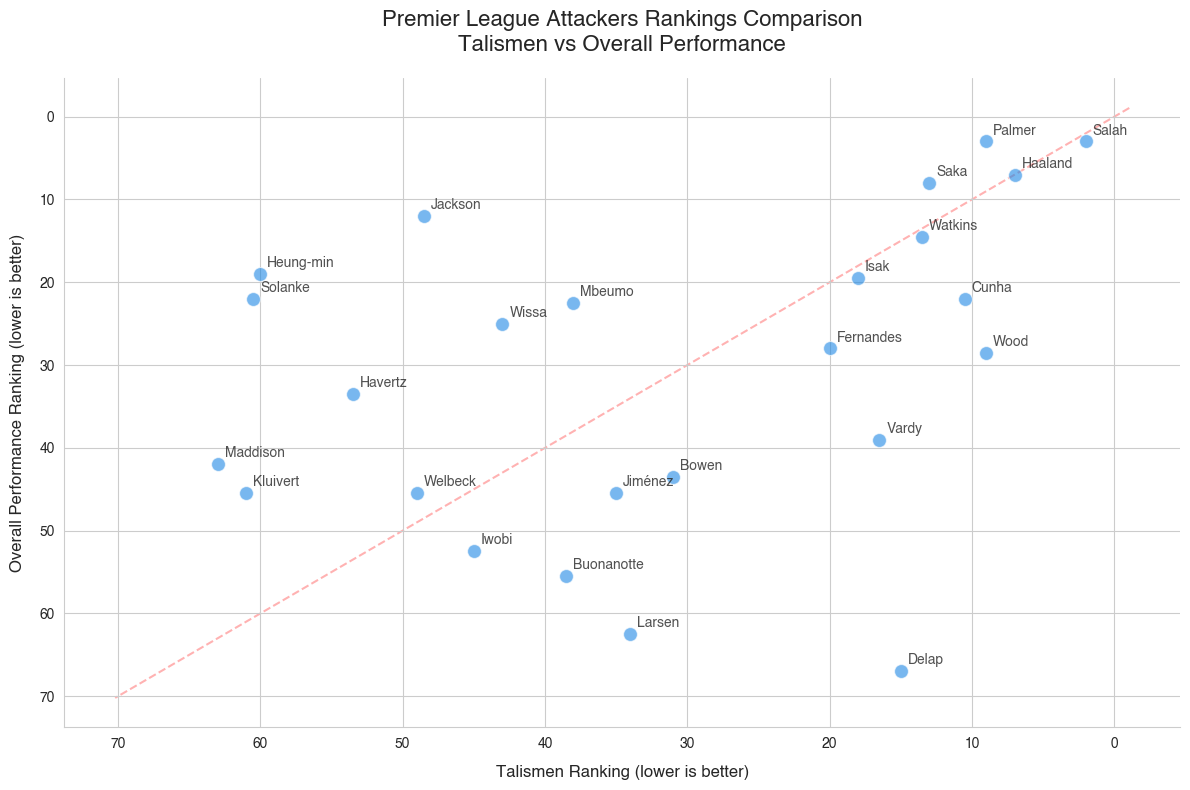

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

# Set the style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Set font family
plt.rcParams['font.family'] = 'Helvetica'

# Create merged dataframe with both rankings
merged_df = pd.merge(
   top_talismen[['player', 'combined_rank']],
   top[['Player', 'combined_rank']].rename(columns={'Player': 'player', 'combined_rank': 'combined_rank_2'}),
   on='player',
   how='inner'
)

# Create the scatter plot
ax = sns.scatterplot(data=merged_df, 
                   x='combined_rank', 
                   y='combined_rank_2',
                   s=100,  # Marker size
                   color='#1e88e5',  # Nice blue color
                   alpha=0.6)

# Add player last names as labels
for idx, row in merged_df.iterrows():
   # Get last name from player name
   lastname = row['player'].split()[-1]
   plt.annotate(lastname, 
               (row['combined_rank'], row['combined_rank_2']),
               xytext=(5, 5),
               textcoords='offset points',
               fontsize=10,
               alpha=0.8,
               fontweight='bold')

# Customize the plot
plt.title('Premier League Attackers Rankings Comparison\nTalismen vs Overall Performance', 
        fontsize=16, 
        pad=20, 
        fontweight='bold')

plt.xlabel('Talismen Ranking (lower is better)', fontsize=12, labelpad=10)
plt.ylabel('Overall Performance Ranking (lower is better)', fontsize=12, labelpad=10)

# Invert both axes since lower is better
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Add diagonal reference line
lims = [
   np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
   np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, '--', color='red', alpha=0.3, zorder=0)

# Beautify the axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [95]:
talismen.sort_values(by='player_g/player_ag', ascending=False).head(20)

,player,squad,player_g,player_ag,player_xg,player_xag,squad_g,squad_xg,player_g+ag,player_xg+xag,player_g+ag/squad_g,player_xg+xag/squad_xg,player_g/player_ag,rank_g_ag_ratio,rank_xg_xag_ratio,combined_rank,delta
180,Erling Haaland,Manchester City,13,1,12.9,1.0,27,28.7,14,13.9,51.851852,48.432056,13.000000,3.0,4.0,7.0,3.419796
472,Yoane Wissa,Brentford,9,1,6.3,0.7,31,23.8,10,7.0,32.258065,29.411765,9.000000,19.0,24.0,43.0,2.8463
103,Liam Delap,Ipswich Town,6,1,4.1,1.0,14,14.1,7,5.1,50.0,36.170213,6.000000,5.0,10.0,15.0,13.829787
218,Brennan Johnson,Tottenham,6,1,6.6,0.8,31,28.2,7,7.4,22.580645,26.241135,6.000000,37.5,32.0,69.5,-3.66049
37,Harvey Barnes,Newcastle Utd,5,1,2.5,2.3,19,21.5,6,4.8,31.578947,22.325581,5.000000,22.0,39.0,61.0,9.253366
282,Bryan Mbeumo,Brentford,9,2,4.3,2.9,31,23.8,11,7.2,35.483871,30.252101,4.500000,17.0,21.0,38.0,5.23177
356,Marcus Rashford,Manchester Utd,4,1,1.7,2.1,19,21.0,5,3.8,26.315789,18.095238,4.000000,30.0,58.5,88.5,8.220551
278,Jean-Philippe Mateta,Crystal Palace,4,1,4.3,1.7,14,19.7,5,6.0,35.714286,30.456853,4.000000,16.0,20.0,36.0,5.257433
389,Antoine Semenyo,Bournemouth,4,1,4.4,2.8,23,30.4,5,7.2,21.73913,23.684211,4.000000,40.0,36.0,76.0,-1.94508
383,Kevin Schade,Brentford,4,1,3.4,0.9,31,23.8,5,4.3,16.129032,18.067227,4.000000,75.0,60.0,135.0,-1.938195


In [96]:
df1 = df1[df1['Comp'] == 'eng Premier League']

df1['Min'] = pd.to_numeric(df1['Min'], errors='coerce')
df1['xG'] = pd.to_numeric(df1['xG'], errors='coerce')
df1['xAG'] = pd.to_numeric(df1['xAG'], errors='coerce')

min_threshold = 0.7 * df1['Min'].max()

dfd = df1[
    (df1['Pos'] == 'DF') & 
    (df1['Min'] > min_threshold)
].copy()

dfd['xG+xAG'] = dfd['xG'] + dfd['xAG']

dfd = dfd[['Player', 'Squad', 'xG+xAG']].copy()

dfd = dfd.merge(
    tm_df[['Squad', 'xGA']], 
    on='Squad', 
    how='left'
)

dfd['off_score'] = (dfd['xG+xAG'] - dfd['xG+xAG'].min()) / (dfd['xG+xAG'].max() - dfd['xG+xAG'].min())
dfd['def_score'] = 1 - (dfd['xGA'] - dfd['xGA'].min()) / (dfd['xGA'].max() - dfd['xGA'].min())  # Invert so higher is better

dfd['power_score'] = (0.3 * dfd['off_score'] + 0.7 * dfd['def_score'])

above_avg_both = (dfd['off_score'] > dfd['off_score'].mean()) & (dfd['def_score'] > dfd['def_score'].mean())
dfd.loc[above_avg_both, 'power_score'] = dfd.loc[above_avg_both, 'power_score'] * 1.1

dfd = dfd.sort_values('power_score', ascending=False)

dfd['power_score'] = dfd['power_score'].round(3)

dfd.head(20)

,Player,Squad,xG+xAG,xGA,off_score,def_score,power_score
3,Trent Alexander-Arnold,Liverpool,3.9,13.5,0.947368,1.000000,1.083
44,Andrew Robertson,Liverpool,2.7,13.5,0.631579,1.000000,0.978
47,William Saliba,Arsenal,2.4,14.2,0.552632,0.966825,0.927
32,Gabriel Magalhães,Arsenal,2.1,14.2,0.473684,0.966825,0.901
15,Lucas Digne,Aston Villa,3.4,17.4,0.815789,0.815166,0.897
37,Daniel Muñoz,Crystal Palace,4.1,21.1,1.000000,0.639810,0.823
35,Nikola Milenković,Nott'ham Forest,2.2,16.9,0.500000,0.838863,0.811
25,Milos Kerkez,Bournemouth,2.6,18.0,0.605263,0.786730,0.806
38,Murillo,Nott'ham Forest,1.8,16.9,0.394737,0.838863,0.776
55,Virgil van Dijk,Liverpool,1.1,13.5,0.210526,1.000000,0.763


In [97]:
url3 = 'https://fbref.com/en/comps/Big5/keepers/players/Big-5-European-Leagues-Stats'

df3 = pd.read_html(url3, attrs={'id': 'stats_keeper'})[0]
df3.head(10)

Unnamed: 0_level_0  Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk              Player             Nation   
0                  1  Julen Agirrezabala             es ESP   
1                  2             Alisson             br BRA   
2                  3     Alphonse Areola             fr FRA   
3                  4   Kepa Arrizabalaga             es ESP   
4                  5        Noah Atubolu             de GER   
5                  6         Emil Audero             it ITA   
6                  7     Augusto Batalla             ar ARG   
7                  8      Oliver Baumann             de GER   
8                  9     Dimitry Bertaud             cd COD   
9                 10         Marco Bizot             nl NED   

  Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                 Pos              Squad                Comp   
0                 GK      Athletic Club          es La Liga   
1                 GK          Liverpool  eng Premier League   
2                 GK           West Ham  eng Premier League   
3                 GK        Bournemouth  eng Premier League   
4                 GK           Freiburg       de Bundesliga   
5                 GK               Como          it Serie A   
6                 GK     Rayo Vallecano          es La Liga   
7                 GK         Hoffenheim       de Bundesliga   
8                 GK        Montpellier          fr Ligue 1   
9                 GK              Brest          fr Ligue 1   

  Unnamed: 6_level_0 Unnamed: 7_level_0 Playing Time         ... Performance  \
                 Age               Born           MP Starts  ...           D   
0             23-352               2000           14     14  ...           4   
1             32-071               1992            6      6  ...           0   
2             31-289               1993            8      8  ...           2   
3             30-070               1994           10     10  ...           0   
4             22-201               2002           11     11  ...           3   
5             27-329               1997            8      8  ...           2   
6             28-226               1996           11     11  ...           3   
7             34-193               1990           13     13  ...           4   
8             26-189               1998            3      3  ...           0   
9             33-277               1991           14     14  ...           1   

              Penalty Kicks                    Unnamed: 27_level_0  
   L CS   CS%         PKatt PKA PKsv PKm Save%             Matches  
0  1  5  35.7             2   1    1   0  50.0             Matches  
1  1  3  50.0             0   0    0   0   NaN             Matches  
2  4  1  12.5             0   0    0   0   NaN             Matches  
3  4  2  20.0             0   0    0   0   NaN             Matches  
4  3  4  36.4             0   0    0   0   NaN             Matches  
5  4  0   0.0             4   4    0   0   0.0             Matches  
6  4  3  27.3             0   0    0   0   NaN             Matches  
7  6  2  15.4             3   1    2   0  66.7             Matches  
8  2  0   0.0             1   1    0   0   0.0             Matches  
9  8  3  21.4             7   5    1   1  16.7             Matches  

[10 rows x 28 columns]

In [98]:
df3 = df3[df3.columns.drop(list(df3.filter(regex='Per 90')))]
df3 = df3.droplevel(0, axis=1)
df3.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%,Matches
0,1,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,23-352,2000,14,14,...,4,1,5,35.7,2,1,1,0,50.0,Matches
1,2,Alisson,br BRA,GK,Liverpool,eng Premier League,32-071,1992,6,6,...,0,1,3,50.0,0,0,0,0,NaN,Matches
2,3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,31-289,1993,8,8,...,2,4,1,12.5,0,0,0,0,NaN,Matches
3,4,Kepa Arrizabalaga,es ESP,GK,Bournemouth,eng Premier League,30-070,1994,10,10,...,0,4,2,20.0,0,0,0,0,NaN,Matches
4,5,Noah Atubolu,de GER,GK,Freiburg,de Bundesliga,22-201,2002,11,11,...,3,3,4,36.4,0,0,0,0,NaN,Matches


In [99]:
pl_gk = df3[df3['Comp'] == 'eng Premier League']
pl_gk.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%,Matches
1,2,Alisson,br BRA,GK,Liverpool,eng Premier League,32-071,1992,6,6,...,0,1,3,50.0,0,0,0,0,NaN,Matches
2,3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,31-289,1993,8,8,...,2,4,1,12.5,0,0,0,0,NaN,Matches
3,4,Kepa Arrizabalaga,es ESP,GK,Bournemouth,eng Premier League,30-070,1994,10,10,...,0,4,2,20.0,0,0,0,0,NaN,Matches
28,28,Ederson,br BRA,GK,Manchester City,eng Premier League,31-117,1993,12,12,...,2,3,2,16.7,1,1,0,0,0.0,Matches
29,29,Łukasz Fabiański,pl POL,GK,West Ham,eng Premier League,39-238,1985,8,7,...,1,3,2,28.6,2,2,0,0,0.0,Matches


In [101]:
pl_gk['MP'] = pd.to_numeric(pl_gk['MP'], errors='coerce')

min_threshold = 0.7 * pl_gk['MP'].max()

pl_gks = pl_gk[
   (pl_gk['MP'] > min_threshold) | (pl_gk['Player'] == 'Alisson')
][['Player', 'Saves', 'MP', 'Squad']].copy()

pl_gks['Saves'] = pd.to_numeric(pl_gks['Saves'], errors='coerce')

pl_gks['Save/90'] = pl_gks['Saves'] / pl_gks['MP']

pl_gks = pl_gks.merge(
   tm_df[['Squad', 'xGA']], 
   on='Squad',
   how='left'
)

pl_gks = pl_gks[['Player', 'Save/90', 'xGA']]

pl_gks['save_score'] = (pl_gks['Save/90'] - pl_gks['Save/90'].min()) / (pl_gks['Save/90'].max() - pl_gks['Save/90'].min())
pl_gks['def_score'] = 1 - (pl_gks['xGA'] - pl_gks['xGA'].min()) / (pl_gks['xGA'].max() - pl_gks['xGA'].min())

pl_gks['power_score'] = (0.4 * pl_gks['save_score'] + 0.6 * pl_gks['def_score'])

above_avg_both = (pl_gks['save_score'] > pl_gks['save_score'].mean()) & (pl_gks['def_score'] > pl_gks['def_score'].mean())
pl_gks.loc[above_avg_both, 'power_score'] = pl_gks.loc[above_avg_both, 'power_score'] * 1.1

pl_gks = pl_gks.sort_values('power_score', ascending=False)

pl_gks['power_score'] = pl_gks['power_score'].round(3)

pl_gks.head(20)

/var/folders/tn/2spq72m9385bz56_ft5yg5s80000gn/T/ipykernel_50684/4249519194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_gk['MP'] = pd.to_numeric(pl_gk['MP'], errors='coerce')


,Player,Save/90,xGA,save_score,def_score,power_score
11,David Raya,2.666667,14.2,0.210526,0.960894,0.661
0,Alisson,2.500000,13.5,0.144737,1.000000,0.658
10,Nick Pope,3.533333,20.4,0.552632,0.614525,0.649
13,Matz Sels,2.866667,16.9,0.289474,0.810056,0.602
2,Mark Flekken,4.666667,25.4,1.000000,0.335196,0.601
5,Bernd Leno,2.733333,18.0,0.236842,0.748603,0.544
12,Robert Sánchez,3.214286,21.7,0.426692,0.541899,0.496
3,Dean Henderson,2.933333,21.1,0.315789,0.575419,0.472
6,Emiliano Martínez,2.133333,17.4,0.000000,0.782123,0.469
9,Jordan Pickford,2.428571,18.9,0.116541,0.698324,0.466
